# Chapter 1 -- Build a very simple neural network and draw graphs of the output

In this notebook, we will build, and draw graphs of the output of the very simple neural network featured in Chapter 1 of **[The StatQuest Illustrated Guide to Neural Networks and AI](https://www.amazon.com/dp/B0DRS71QVQ)** and seen in the figure below.

<img src="./images/chapter_1_pre_trained_nn.png" alt="a pre-trained neural network" style="width: 800px;">

More precisely, we will:

- **Code a neural network with pre-trained weights and biases**. This will show the basic structure of a class that inherits from `nn.Module` and how to use `torch.tensor()` to create pre-trained Weights and Biases.
- **Run some data through the neural network**. This is called making a **forward pass** through the neural network.
- **Draw graphs of the y-axis values generated by various parts of the neural network**. This will show how the y-axis coordinates that come out of the activation functions are scaled and then added up to create the bent shape that fits to the data.

_Note_: this tutorial assumes that we already know the basics of coding in **Python** and have read the first chapter in **The StatQuest Illustrated Guide to Neural Networks and AI**.

## Import the modules

The very first thing we need to do is load a bunch of Python modules. These modules give us extra functionality to create and train a Neural Network.

In [1]:
%%capture
# %%capture prevents this cell from printing a ton of STDERR stuff to the screen

## NOTE: If you **don't** need to install anything, you can comment out the
# !pip install seaborn


In [22]:
import torch
import torch.nn as nn            # gives us nn.Module(), nn.Embedding() and nn.Linear()
import torch.nn.functional as F  # gives us relu()

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]= (2,2)

## Create the Pre-Trained Neural Network from Chapter 1

In this section, we will create the pre-trained neural network that is illustrated in Chapter 1 in a class that inherits from `nn.Module` at least these two methods.

### An `__init__()` method

The `__init__()` method is called when we create an object from this class. This is where we create and initialize the weights and biases in the neural network. When we create a class that inherits from another class then we always call the parent's `__init__()` method with `super()`.

Each Weight and Bias is a [`torch.tensor` object](https://docs.pytorch.org/docs/stable/tensors.html).


### A `forward()` method

The `forward()` method is called by default when we pass values to an object created from this class. This is where we do the math associated with running data through the neural network.

In order to create the **Weights** and **Biases** in the model, we will label each one as seen in the figure below:

<img src="./images/chapter_1_pre_trained_nn_labeled.png" alt="a pre-trained neural network with labeled weights and biases" style="width: 800px;">

In [3]:
class myNN(nn.Module):

    def __init__(self):
        super().__init__()

        ## NOTE: w1 = weight 1, b1 = bias 1 etc. (as seen in the figure above).
        self.w1 = torch.tensor(1.43)
        self.b1 = torch.tensor(-0.61)

        self.w2 = torch.tensor(2.63)
        self.b2 = torch.tensor(-0.27)

        self.w3 = torch.tensor(-3.89)
        self.w4 = torch.tensor(1.35)


    def forward(self, input_values):
        top_x_axis_values = (input_values * self.w1) + self.b1
        bottom_x_axis_values = (input_values * self.w2) + self.b2

        top_y_axis_values = F.relu(top_x_axis_values)
        bottom_y_axis_values = F.relu(bottom_x_axis_values)

        output_values = (top_y_axis_values * self.w3) + (bottom_y_axis_values * self.w4)

        return output_values

## Run some data through the neural network

First, let's create an instance of our neural network. We'll call it "model" since that is the standard terminology in the field.

In [4]:
model = myNN()

In [5]:
print("Data type of the first weigth tensor:", model.w1.dtype)

Data type of the first weigth tensor: torch.float32


Now let's see what the neural network outputs for Doses = 0.0, 0.5, and 1.0.

In [6]:
# Create a tensor with input doses
doses = torch.tensor([0.0, 0.5, 1.0])

# Pass the doses to the model to compute the output.
# By default, the forward() method will be called on the input

model(doses)

tensor([ 0.0000,  1.0023, -0.0038])

Let's calculate by hand the output effectivenes for a dose of $0.5$

In [7]:
input_dose = 0.5

print(f"Output for an input dose of {input_dose}:")

output_effectiveness = (
    max(  # ReLU
        input_dose * model.w1 + model.b1,
        0
    ) * model.w3 +
    max(  # ReLU
        input_dose * model.w2 + model.b2,
        0
    ) * model.w4
)

print(output_effectiveness)

Output for an input dose of 0.5:
tensor(1.0023)


To make the output a little easier to read we can use `torch.round()` to round it to the nearest 100th.

In [8]:
torch.round(model(doses), decimals=2)

tensor([0., 1., -0.])

In [9]:
# Test with some other values
model(torch.tensor([-1, 0.75, 10]))

tensor([  0.0000,   0.4993, -18.1136])

It seems that the effectiveness for very high doses is overestimated... Don't forget that we are extrapolating here, as we should stay in the range of 'learning' doses, i.e., between 0 and 1.

## Plot the various stages of the Neural Network

First, let's remember what the neural network looks like.

<img src="./images/chapter_1_pre_trained_nn_labeled.png" alt="a pre-trained neural network" style="width: 800px;">

### Output from the top activation function

We can now draw a graph of the output from the top activation function.

Create the different doses we want to run through the neural network.

`torch.linspace()` creates the sequence of numbers between, and including, 0 and 1.

In [10]:
input_doses = torch.linspace(start=0, end=1, steps=11)

# now print out the doses to make sure they are what we expect...
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Now multiply the doses by the weight (`w1`) and add the bias (`b1`) on the connection from the input to the top activation function.

In [11]:
top_x_axis_values = (model.w1 * input_doses) + model.b1
top_x_axis_values

tensor([-0.6100, -0.4670, -0.3240, -0.1810, -0.0380,  0.1050,  0.2480,  0.3910,
         0.5340,  0.6770,  0.8200])

Run those x-axis values through the ReLU, i.e., the maximum value between 0 and the the actual x-values. Said differently, all the negative values will be set to zero.

In [12]:
top_y_axis_values = F.relu(top_x_axis_values)
top_y_axis_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1050, 0.2480, 0.3910, 0.5340,
        0.6770, 0.8200])

Now draw a graph of the input doses and the y-axis output values from the ReLU

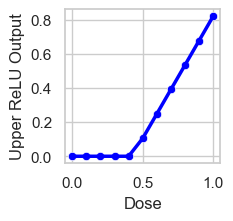

In [25]:
## First, draw the individual points
sns.scatterplot(
    x=input_doses,
    y=top_y_axis_values,
    color='blue',
    )

## Now connect those points with a line
sns.lineplot(
    x=input_doses,
    y=top_y_axis_values,
    color='blue',
    linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Upper ReLU Output')
plt.xlabel('Dose');

### Output from the bottom activation function

Similarly, we draw a graph of the output from the bottom activation function. We just multiply the doses by the weight (`w2`) and add the bias (`b2`) on the connection from the input to the bottom activation function.

In [14]:
bottom_x_axis_values = (model.w2 * input_doses) + model.b2
bottom_x_axis_values

tensor([-0.2700, -0.0070,  0.2560,  0.5190,  0.7820,  1.0450,  1.3080,  1.5710,
         1.8340,  2.0970,  2.3600])

In [15]:
## now run those x-axis values through the ReLU...
bottom_y_axis_values = F.relu(bottom_x_axis_values)
bottom_y_axis_values

tensor([0.0000, 0.0000, 0.2560, 0.5190, 0.7820, 1.0450, 1.3080, 1.5710, 1.8340,
        2.0970, 2.3600])

Draw a graph of the input doses and the y-axis output values from the ReLU.

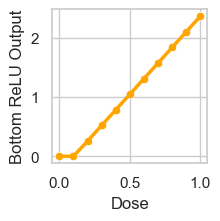

In [26]:
# First, draw the individual points
sns.scatterplot(
    x=input_doses,
    y=bottom_y_axis_values,
    color='orange',
    )

# Now connect those points with a line
sns.lineplot(
    x=input_doses,
    y=bottom_y_axis_values,
    color='orange',
    linewidth=2.5)

# now label the y- and x-axes.
plt.ylabel('Bottom ReLU Output')
plt.xlabel('Dose');

### Output from both activation functions

Draw a graph of the outputs from the top and bottom activation functions on the same graph.

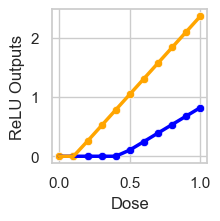

In [27]:
# Now put both bent shapes on the same graph
# Draw the individual points (top)
sns.scatterplot(
    x=input_doses,
    y=top_y_axis_values,
    color='blue',
    )

# Connect those points with a line (top)
sns.lineplot(
    x=input_doses,
    y=top_y_axis_values,
    color='blue',
    linewidth=2.5)

# Draw the individual points (bottom)
sns.scatterplot(
    x=input_doses,
    y=bottom_y_axis_values,
    color='orange',
    )

# Connect those points with a line (bottom)
sns.lineplot(
    x=input_doses,
    y=bottom_y_axis_values,
    color='orange',
    linewidth=2.5)

# now label the y- and x-axes.
plt.ylabel('ReLU Outputs')
plt.xlabel('Dose');

### Scaling the bent shapes

Now stretch those bent shapes by scaling them by the final weights in the neural network

In [18]:
final_top_y_axis_values = top_y_axis_values * model.w3
final_top_y_axis_values

final_bottom_y_axis_values = bottom_y_axis_values * model.w4
final_bottom_y_axis_values

tensor([0.0000, 0.0000, 0.3456, 0.7007, 1.0557, 1.4108, 1.7658, 2.1209, 2.4759,
        2.8310, 3.1860])

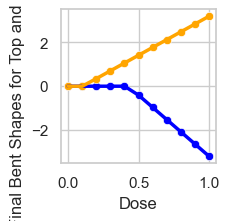

In [28]:
# Now put both bent shapes on the same graph
# Draw the individual points (top)
sns.scatterplot(
    x=input_doses,
    y=final_top_y_axis_values,
    color='blue',
    )

# Connect those points with a line (top)
sns.lineplot(
    x=input_doses,
    y=final_top_y_axis_values,
    color='blue',
    linewidth=2.5)

# Draw the individual points (bottom)
sns.scatterplot(
    x=input_doses,
    y=final_bottom_y_axis_values,
    color='orange',
    )

# Connect those points with a line (bottom)
sns.lineplot(
    x=input_doses,
    y=final_bottom_y_axis_values,
    color='orange',
    linewidth=2.5)

# now label the y- and x-axes.
plt.ylabel('Final Bent Shapes for Top and Bottom')
plt.xlabel('Dose');

### Final bent shape

Let's finally show the final shape that we get when we add together the two bent shapes.

In [20]:
final_bent_shape = final_top_y_axis_values + final_bottom_y_axis_values
final_bent_shape

tensor([ 0.0000,  0.0000,  0.3456,  0.7007,  1.0557,  1.0023,  0.8011,  0.5999,
         0.3986,  0.1974, -0.0038])

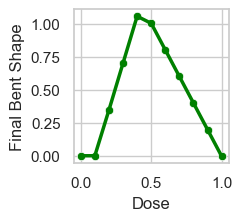

In [29]:
# Now put both bent shapes on the same graph
# Draw the individual points
sns.scatterplot(
    x=input_doses,
    y=final_bent_shape,
    color='green',
    )

# Connect those points with a line
sns.lineplot(
    x=input_doses,
    y=final_bent_shape,
    color='green',
    linewidth=2.5)

# now label the y- and x-axes.
plt.ylabel('Final Bent Shape')
plt.xlabel('Dose');